# **Goal: Predict the price of a Toyota used car based on its features**

**PACKAGES IMPORT**

Import of relevant packages for both exploratory analysis and machine learning.

In [ ]:
import numpy as np       #packages for exploratory analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures    #packages for machine learning
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import preprocessing


Import Toyota Dataset from Google Drive

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#import io
#df_skoda = pd.read_csv(io.BytesIO(uploaded['toyota.csv']))

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df_toyota= pd.read_csv('/content/drive/MyDrive/Data-Science-project-files/uk used cars/toyota.csv')

**PEARSON CORRELATION**

In [ ]:
pearsoncorr = df_toyota.corr(method='pearson')
pearsoncorr

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.420959,-0.727749,0.283455,-0.020607,-0.045567
price,0.420959,1.000000,-0.297936,0.214498,-0.039910,0.727592
mileage,-0.727749,-0.297936,1.000000,-0.205285,0.044889,0.182615
tax,0.283455,0.214498,-0.205285,1.000000,-0.430292,0.155727
mpg,-0.020607,-0.039910,0.044889,-0.430292,1.000000,-0.106868
engineSize,-0.045567,0.727592,0.182615,0.155727,-0.106868,1.000000


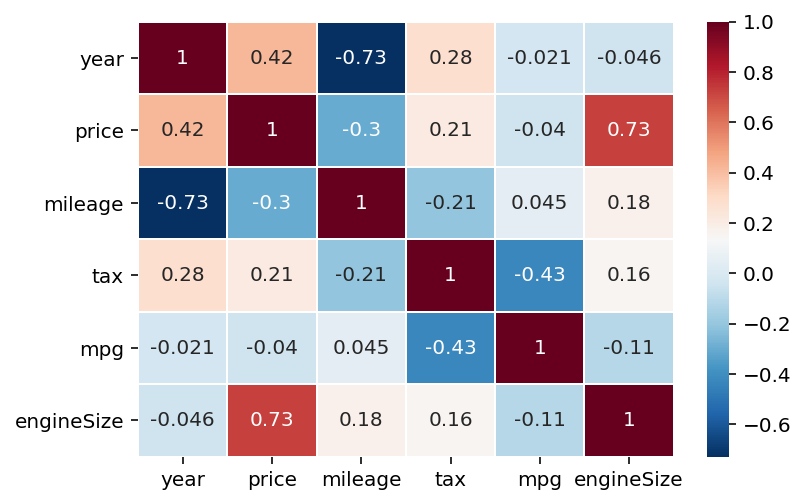

In [ ]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5);

# **EXPLORATORY ANALYSIS**

**Analysis of the dataset head, of the variables data types and of the shape of the dataset**

In [ ]:
df_toyota.head()              #analysis of the dataset head to study dataset structure

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [ ]:
df_toyota.info()        #analysis of the dataset columns and of their data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [ ]:
df_toyota.shape             

(6738, 9)

**Check for duplicates**

In [ ]:
sum(df_toyota.duplicated())    #Check for duplicates

39

In [ ]:
df_toyota.drop_duplicates(inplace = True) #duplicates removal

In [ ]:
sum(df_toyota.duplicated())         #double-check to verify that duplicated columns are not present anymore 

0

In [ ]:
df_toyota.describe()             #analysis of statistical features such five numbers summary, count and mean. 

,year,price,mileage,tax,mpg,engineSize
count,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000
mean,2016.742797,12529.799074,22889.588745,94.549933,63.078728,1.471996
std,2.205271,6358.562625,19109.288501,73.942649,15.861037,0.435624
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8266.500000,9488.500000,0.000000,55.400000,1.000000
50%,2017.000000,10798.000000,18571.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31059.500000,145.000000,70.600000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [ ]:
df_toyota.loc[:, df_toyota.isnull().any()].columns  #Check for missing values

Index([], dtype='object')

**ANALYSIS OF THE INDEPENDENT VARIABLES AGAINST DEPENDENT VARIABLE (PRICE)**

**MILEAGE**

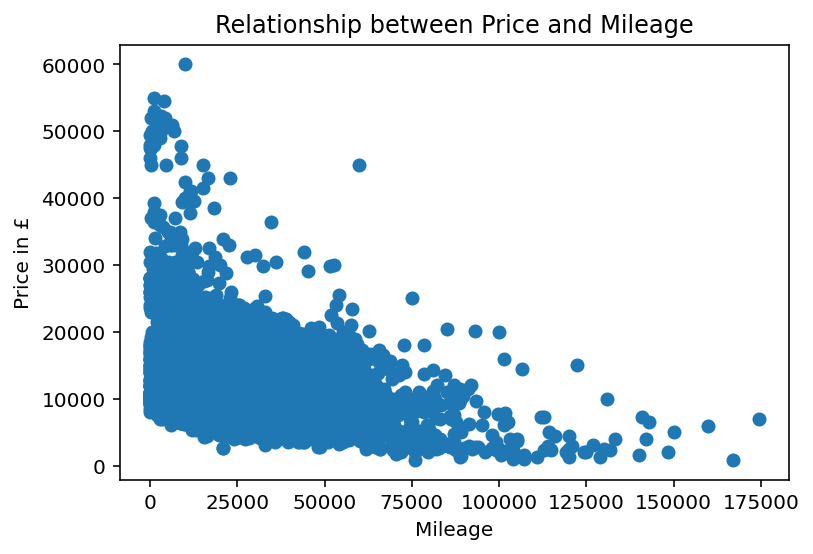

In [ ]:
x = df_toyota['mileage']
plt.xlabel('Mileage')
y = df_toyota ['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Mileage')
plt.show()

**TAX**

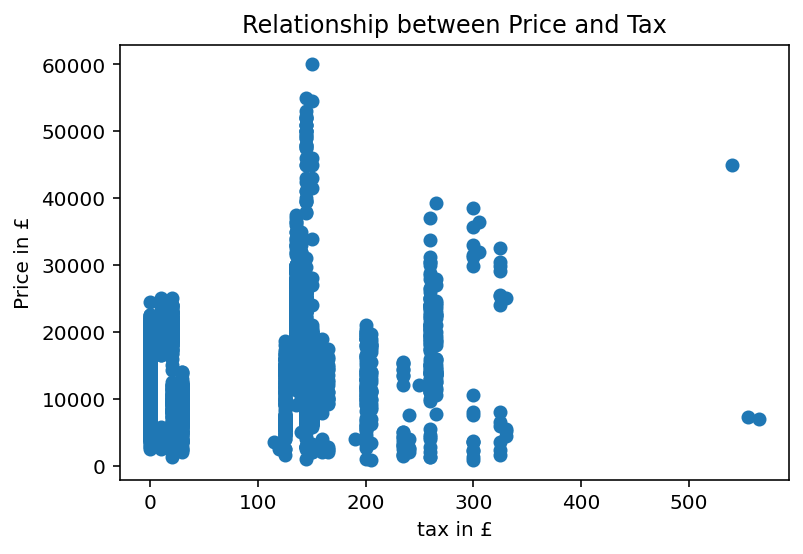

In [ ]:
x = df_toyota['tax']
plt.xlabel('tax in £')
y = df_toyota['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Tax')
plt.show()

**MILES PER GALLON**

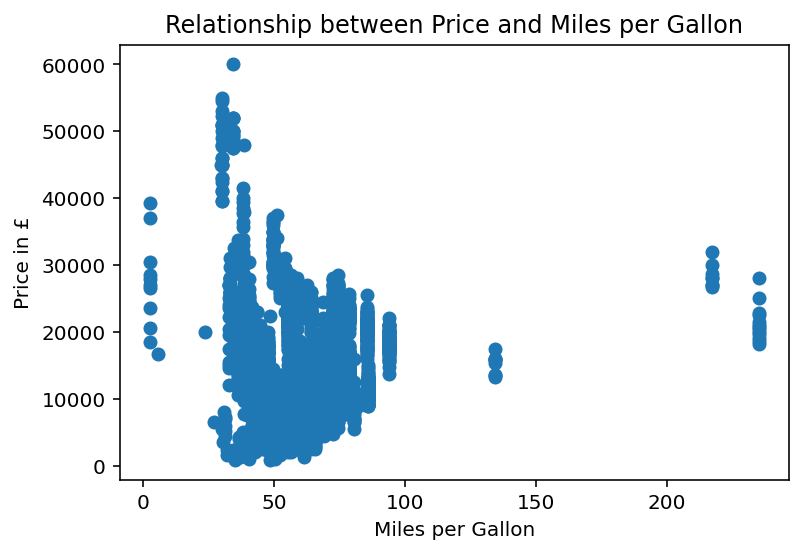

In [ ]:
x = df_toyota['mpg']
plt.xlabel('Miles per Gallon')
y = df_toyota['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Miles per Gallon')
plt.show()

In [ ]:
miles_pg= df_toyota.loc[:, ['mpg', 'price']]  #creation of a new dataset taking just the "mpg" and "price" columns from the original dataset

In [ ]:
miles_pg.head()

,mpg,price
0,36.2,16000
1,36.2,15995
2,36.2,13998
3,36.2,18998
4,36.2,17498


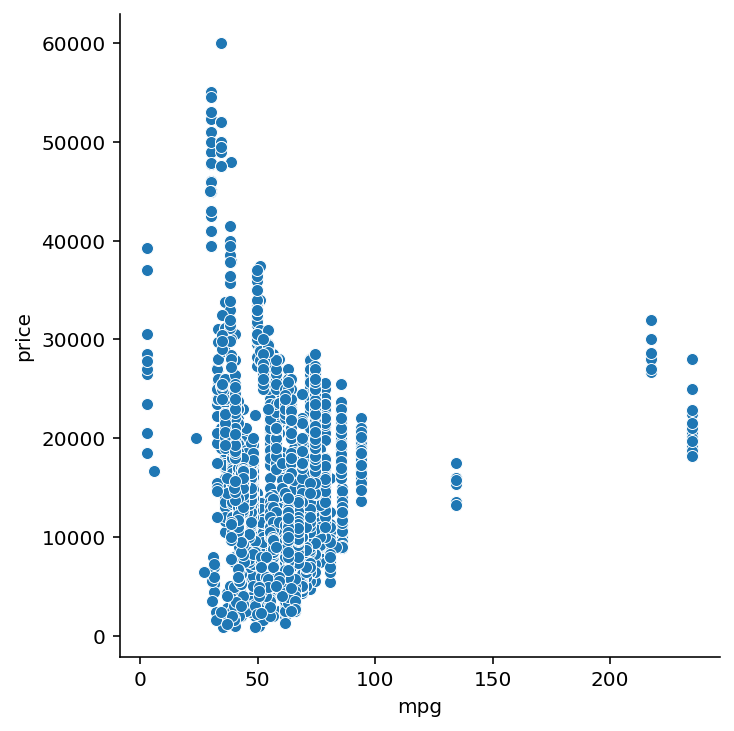

In [ ]:
sns.relplot(x="mpg", y="price", data=miles_pg);    #creation of a more detailed plot using seaborn 

**ENGINE SIZE**

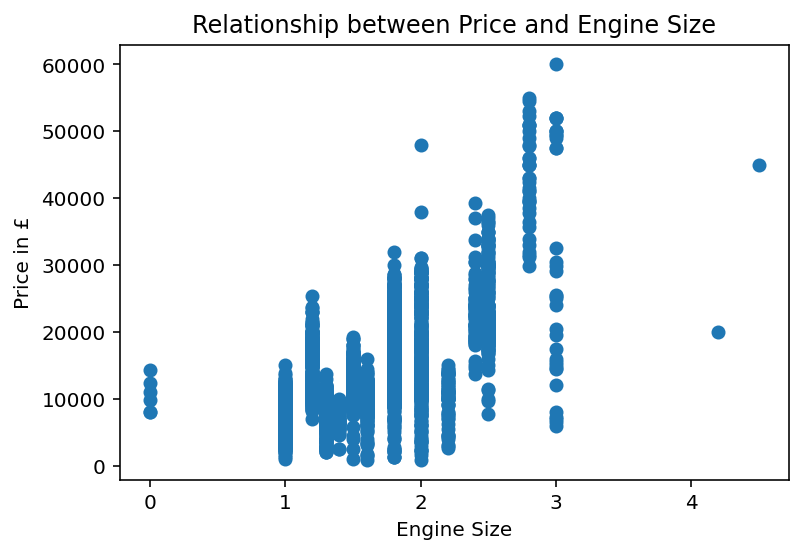

In [ ]:
x = df_toyota['engineSize']
plt.xlabel('Engine Size')
y = df_toyota['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Engine Size')
plt.show()

In [ ]:
df_toyota.loc[df_toyota['engineSize'] == 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2535,Yaris,2016,12300,Manual,6148,Hybrid,0,86.0,0.0
2545,Yaris,2016,11000,Automatic,39909,Hybrid,0,86.0,0.0
5126,Aygo,2019,9800,Manual,3635,Petrol,150,56.5,0.0
5233,Aygo,2019,8000,Manual,8531,Petrol,145,56.5,0.0
5257,Aygo,2019,8000,Manual,5354,Petrol,145,56.5,0.0
5960,C-HR,2017,14300,Manual,46571,Petrol,145,47.1,0.0


In [ ]:
df_toyota.drop(df_toyota[df_toyota['engineSize'] == 0].index, inplace = True)

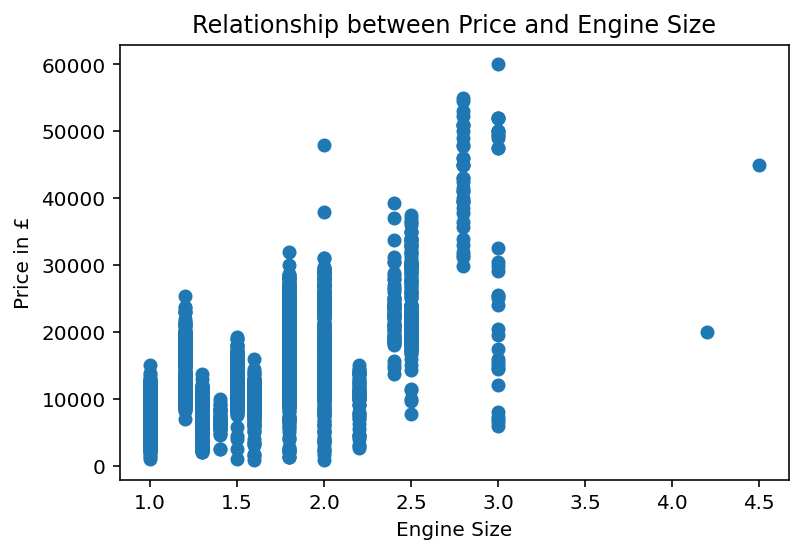

In [ ]:
x = df_toyota['engineSize']
plt.xlabel('Engine Size')
y = df_toyota['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Engine Size')
plt.show()

**FUEL TYPE**

In [ ]:
df_toyota.loc[:, ['fuelType', 'price']]

,fuelType,price
0,Petrol,16000
1,Petrol,15995
2,Petrol,13998
3,Petrol,18998
4,Petrol,17498
...,...,...
6733,Petrol,5500
6734,Petrol,4985
6735,Diesel,4995
6736,Petrol,3995


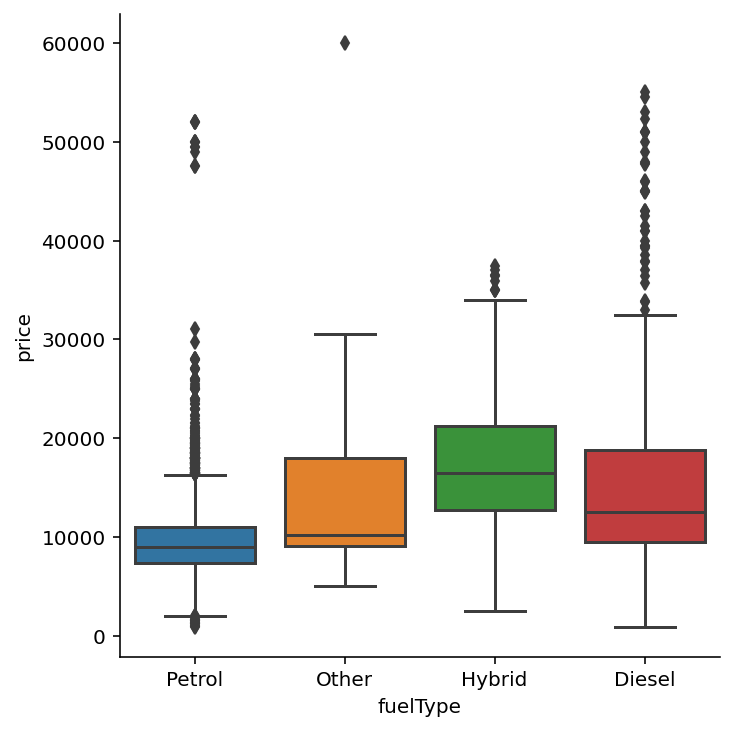

In [ ]:
sns.catplot(x="fuelType", y="price", kind="box", data= df_toyota);

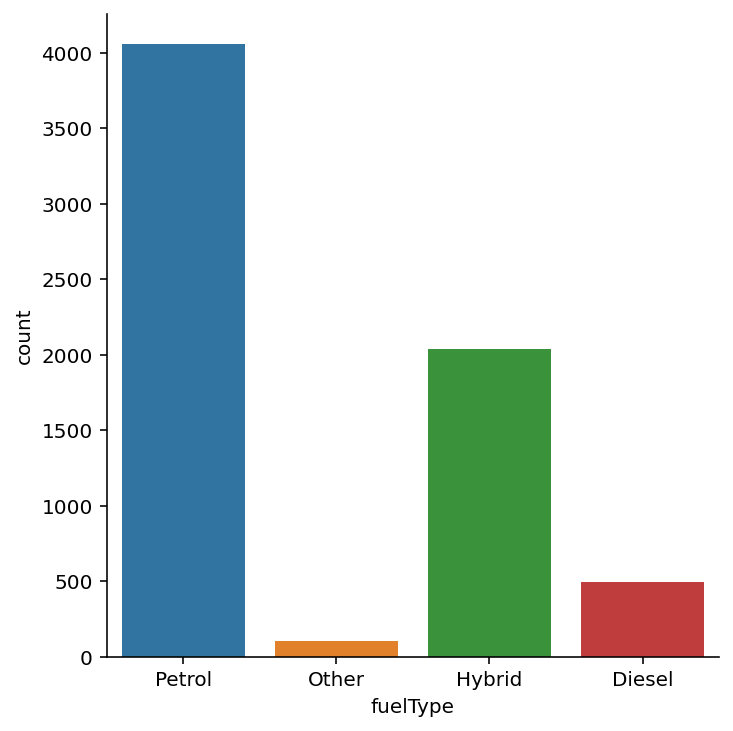

In [ ]:
sns.catplot(x="fuelType", kind="count", data=df_toyota);   #calculated frequency of each fuel type 

**TRANSMISSION**

In [ ]:
df_toyota.loc[:, ['transmission', 'price']]

,transmission,price
0,Manual,16000
1,Manual,15995
2,Manual,13998
3,Manual,18998
4,Manual,17498
...,...,...
6733,Automatic,5500
6734,Manual,4985
6735,Manual,4995
6736,Manual,3995


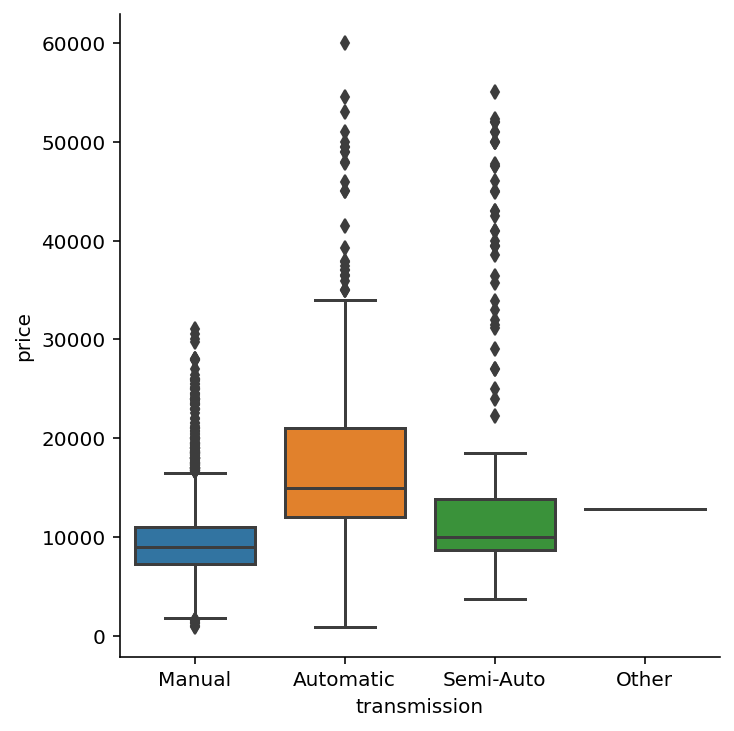

In [ ]:
sns.catplot(x="transmission", y="price", kind="box", data= df_toyota);

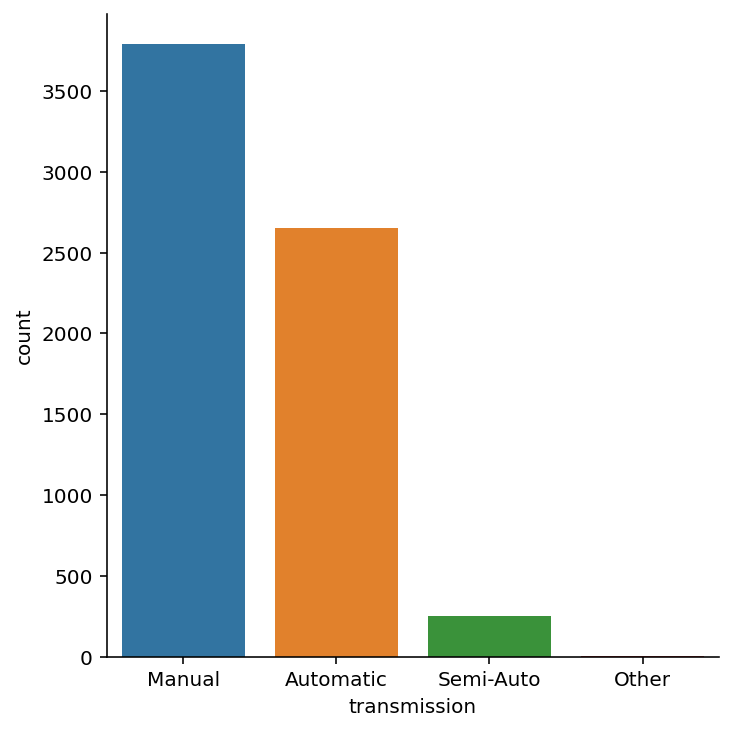

In [ ]:
sns.catplot(x="transmission", kind="count", data=df_toyota);

**MODEL**

In [ ]:
df_toyota.loc[:, ['model', 'price']]

,model,price
0,GT86,16000
1,GT86,15995
2,GT86,13998
3,GT86,18998
4,GT86,17498
...,...,...
6733,IQ,5500
6734,Urban Cruiser,4985
6735,Urban Cruiser,4995
6736,Urban Cruiser,3995


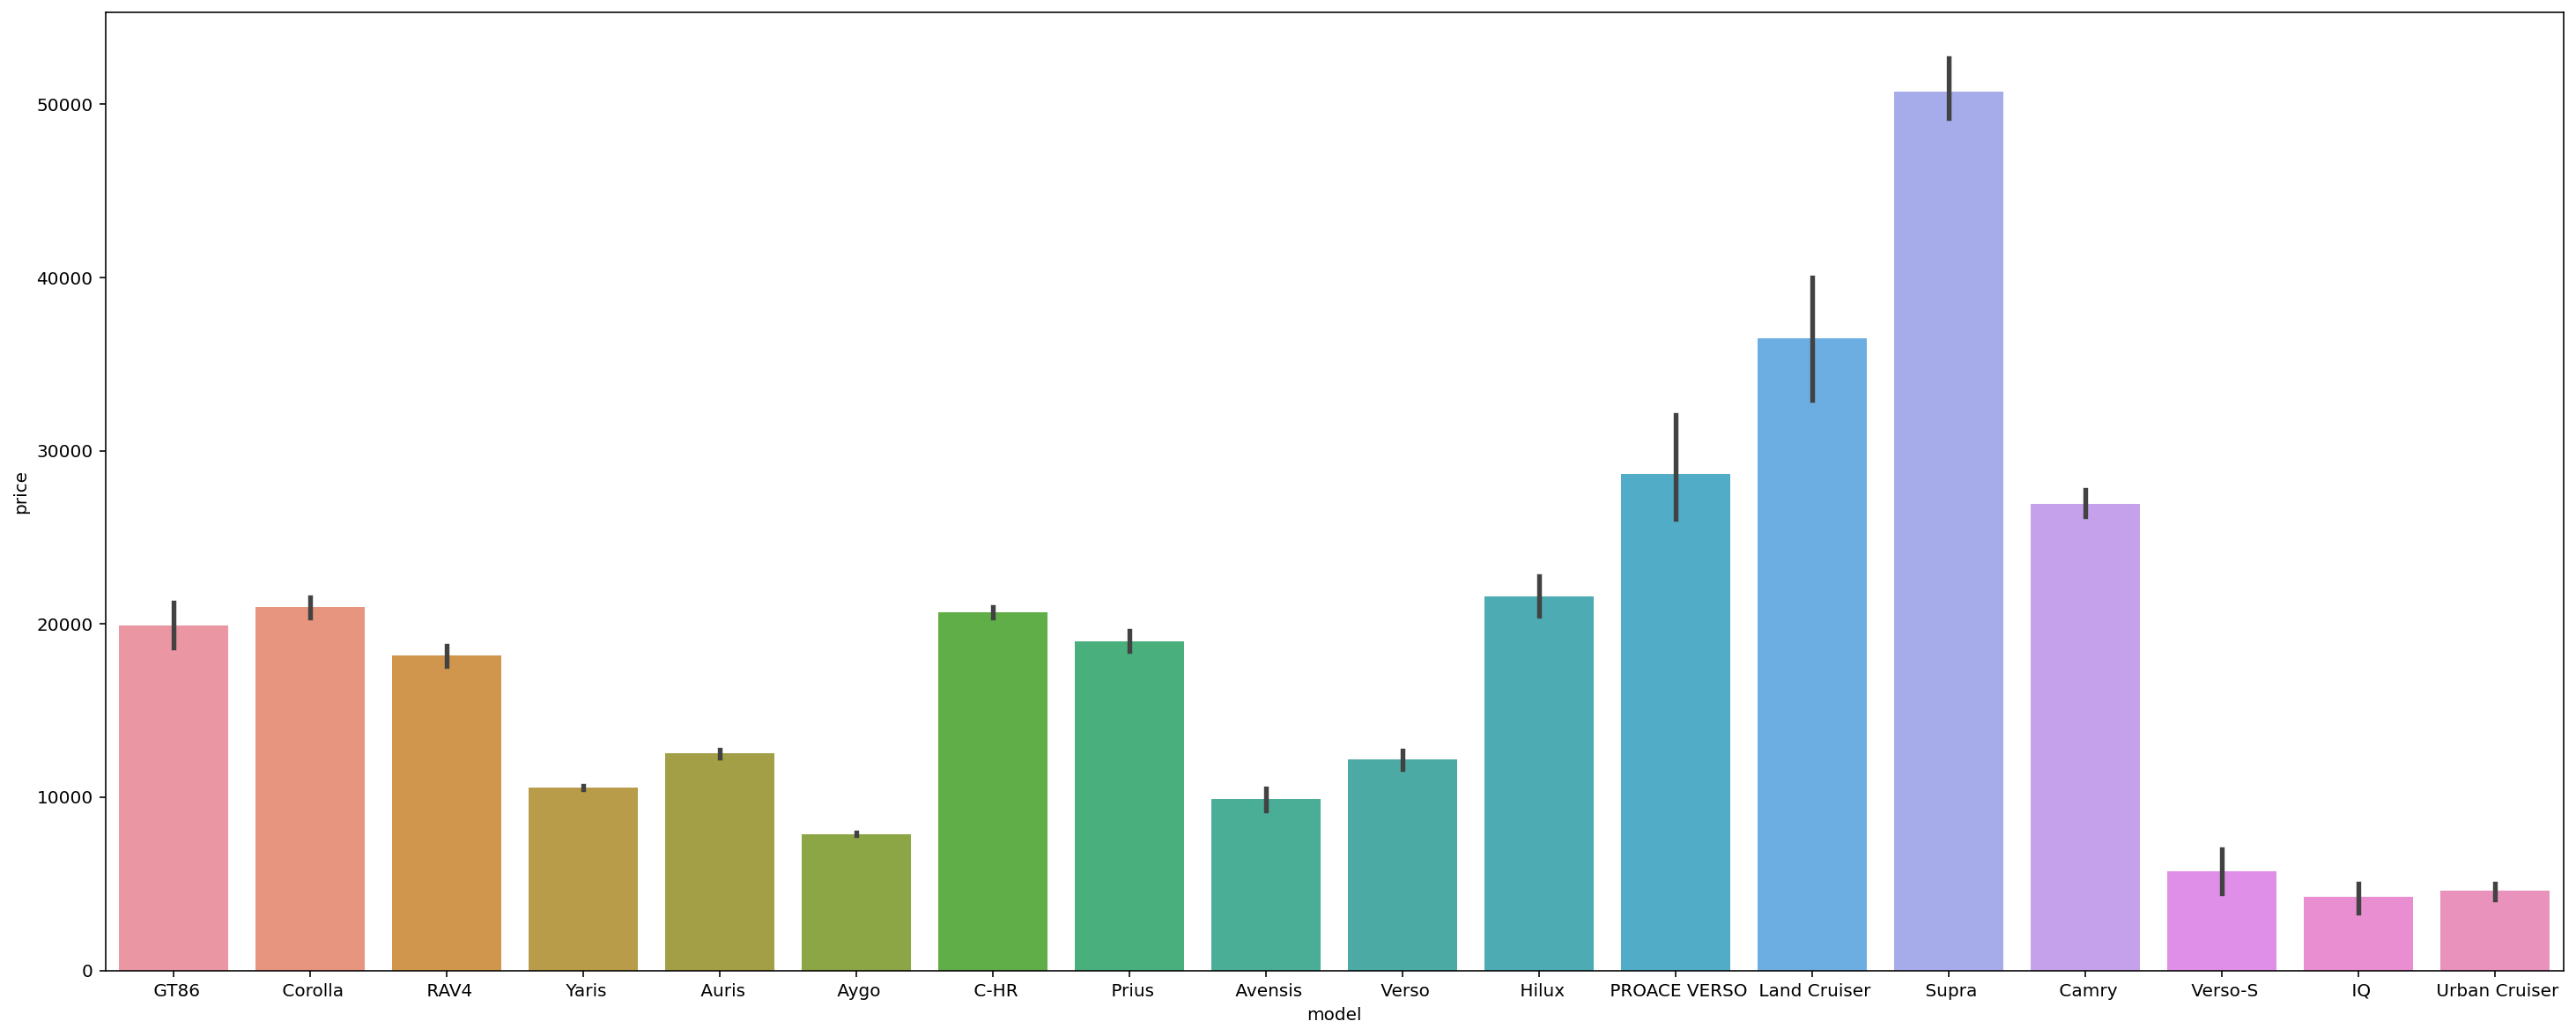

In [ ]:
fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "model", y = "price", ax=ax, data=df_toyota)
plt.show()

In [ ]:
toyota_ML = df_toyota.copy()      #creation of a new cleaned dataset to use as a base for the ML part 

In [ ]:
toyota_ML.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


# **MACHINE LEARNING**


**Putting the output column (price) to the right end**

In [ ]:
toyota_ML = toyota_ML[['model','year','transmission','mileage','fuelType','tax','mpg','engineSize','price']]
toyota_ML.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,GT86,2016,Manual,24089,Petrol,265,36.2,2.0,16000
1,GT86,2017,Manual,18615,Petrol,145,36.2,2.0,15995
2,GT86,2015,Manual,27469,Petrol,265,36.2,2.0,13998
3,GT86,2017,Manual,14736,Petrol,150,36.2,2.0,18998
4,GT86,2017,Manual,36284,Petrol,145,36.2,2.0,17498


**Creation of dummy variables to deal with categorical features of the dataset**

In [ ]:
toyota_ML_dummy= pd.get_dummies(toyota_ML)
toyota_ML_dummy.head()
toyota_ML_dummy.shape

(6693, 32)

In [ ]:
toyota_ML_dummy.head()

,year,mileage,tax,mpg,engineSize,price,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,model_ GT86,model_ Hilux,model_ IQ,model_ Land Cruiser,model_ PROACE VERSO,model_ Prius,model_ RAV4,model_ Supra,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2016,24089,265,36.2,2.0,16000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2017,18615,145,36.2,2.0,15995,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,2015,27469,265,36.2,2.0,13998,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,2017,14736,150,36.2,2.0,18998,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,2017,36284,145,36.2,2.0,17498,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(toyota_ML_dummy.drop(columns = ['price']),
                                                    toyota_ML_dummy[['price']],
                                                    test_size = 0.2, random_state = 42)

**From here onwards, two options have been taken into consideration. First is to use XGBoost and the second is to select best linear and polynomial features without using features scaling (would have lead to overfitting)**

**1st Method: XGBoost**


In [ ]:
import xgboost
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.005,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=15000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [ ]:
model.fit(X_train,y_train)

[22:11:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.005, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=15000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
R_square=r2_score(y_pred,y_test)
print(R_square)

0.972962399237855


In [ ]:
y_pred_df= pd.DataFrame({'Price_prediction': y_pred})
y_test_df = pd.DataFrame(y_test)
y_test = y_test.reset_index()
Comparison = y_test.join(y_pred_df) 
Comparison = Comparison.drop(['index'], axis=1)
Comparison.head()

,price,Price_prediction
0,6790,7304.157715
1,8900,8660.700195
2,17995,17814.546875
3,7100,7928.446289
4,22995,23287.716797


In [ ]:
print(y_pred)

[ 7304.1577  8660.7    17814.547  ... 10322.01    9322.317   9423.857 ]


**2nd Method: use linear and polynomial features to identify best ML technique**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(toyota_ML_dummy.drop(columns = ['price']),
                                                    toyota_ML_dummy[['price']],
                                                    test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5354, 31)
(5354, 1)
(1339, 31)
(1339, 1)


**Best features evaluation**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

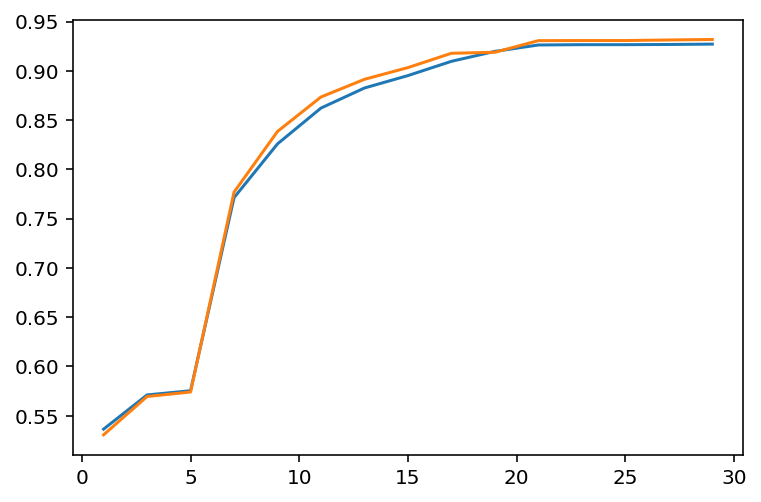

In [ ]:
features = toyota_ML_dummy.drop(columns = ['price']).columns

N = []                                                                  
r_squared_train = []
r_squared_test = []

for k in range(1, 31, 2):   
    
    selector = SelectKBest(f_regression, k = k)                   
    
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    
    LR = LinearRegression()
    LR.fit(X_train_transformed, y_train)
    
    N.append(k)
    r_squared_train.append(LR.score(X_train_transformed, y_train))
    r_squared_test.append(LR.score(X_test_transformed, y_test))
    
sns.lineplot(x = N, y = r_squared_train)
sns.lineplot(x = N, y = r_squared_test)
plt.show()

In [ ]:
selector = SelectKBest(f_regression, k = 21)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
features[selector.get_support()]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['year', 'mileage', 'tax', 'engineSize', 'model_ Aygo', 'model_ C-HR',
       'model_ Camry', 'model_ Corolla', 'model_ GT86', 'model_ Hilux',
       'model_ Land Cruiser', 'model_ PROACE VERSO', 'model_ Prius',
       'model_ RAV4', 'model_ Supra', 'model_ Yaris', 'transmission_Automatic',
       'transmission_Manual', 'fuelType_Diesel', 'fuelType_Hybrid',
       'fuelType_Petrol'],
      dtype='object')

**Definition of a linear regression function to identify the best model for prediction**

In [ ]:
def regression_function(model):
    
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)   
    return regressor, score

In [ ]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])
model_selections = [LinearRegression(),  MLPRegressor(), Ridge(), SVR(), RandomForestRegressor()]

for model in model_selections:
    regressor, score = regression_function(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score},ignore_index=True)

model_performance

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example us

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.930610
1,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.232722
2,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.930135
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",-0.086356
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.960724


**Definition of a polynomial regression function to identify the best model for prediction**

In [ ]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

(5354, 528)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

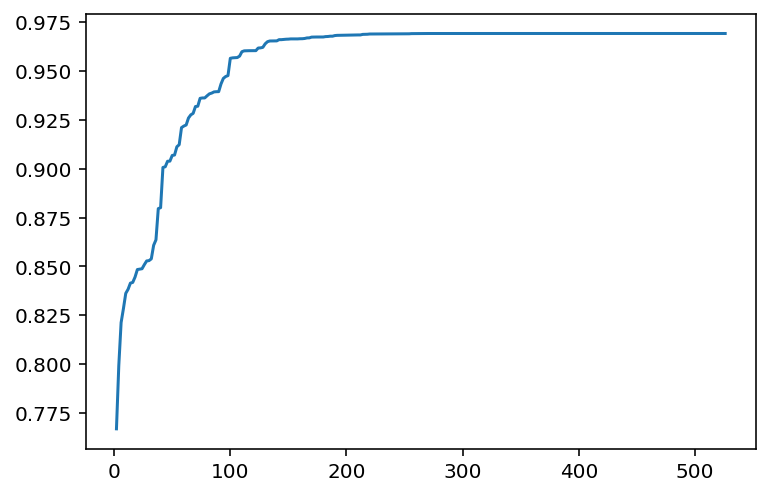

In [ ]:
N = []   #no.of features
r_squared = []

for k in range(2, 528, 2): 
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
    R = LinearRegression()
    R.fit(X_train_transformed, y_train)
    N.append(k)
    r_squared.append(R.score(X_train_transformed, y_train))
    
sns.lineplot(x = N, y = r_squared)
plt.show()

In [ ]:
selector = SelectKBest(f_regression, k =250)

X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
X_test_transformed = selector.transform(X_test_transformed_poly)

models_used = [LinearRegression(), MLPRegressor(), Ridge(), SVR(), RandomForestRegressor()]

for model in models_used:
    regressor, score = regression_function(model)
    model_performance = model_performance.append({"Features": "Polynomial","Model": model, "Score": score}, ignore_index=True)

model_performance

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.930610
1,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.232722
2,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.930135
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",-0.086356
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.960724
5,Polynomial,"LinearRegression(copy_X=True, fit_intercept=Tr...",-270.430181
6,Polynomial,"MLPRegressor(activation='relu', alpha=0.0001, ...",-5.973917
7,Polynomial,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.961617
8,Polynomial,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",-0.091775
9,Polynomial,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.969056


**Random Forest has turned out to be the best model both for linear and polynomial regression**

In [ ]:
RF = RandomForestRegressor(n_estimators = 3000, random_state = 42)
RF.fit(X_train_transformed_poly, y_train)

y_pred = RF.predict(X_test_transformed_poly)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
y_test = y_test.reset_index()
y_pred_df = pd.DataFrame({'Price_prediction': y_pred.flatten()})

In [ ]:
Comparison = y_test.join(y_pred_df) 
Comparison = Comparison.drop(['index'], axis=1)
Comparison.head()

,price,Price_prediction
0,6790,6933.668000
1,8900,8655.002000
2,17995,19115.828000
3,7100,7196.106333
4,22995,23291.560333


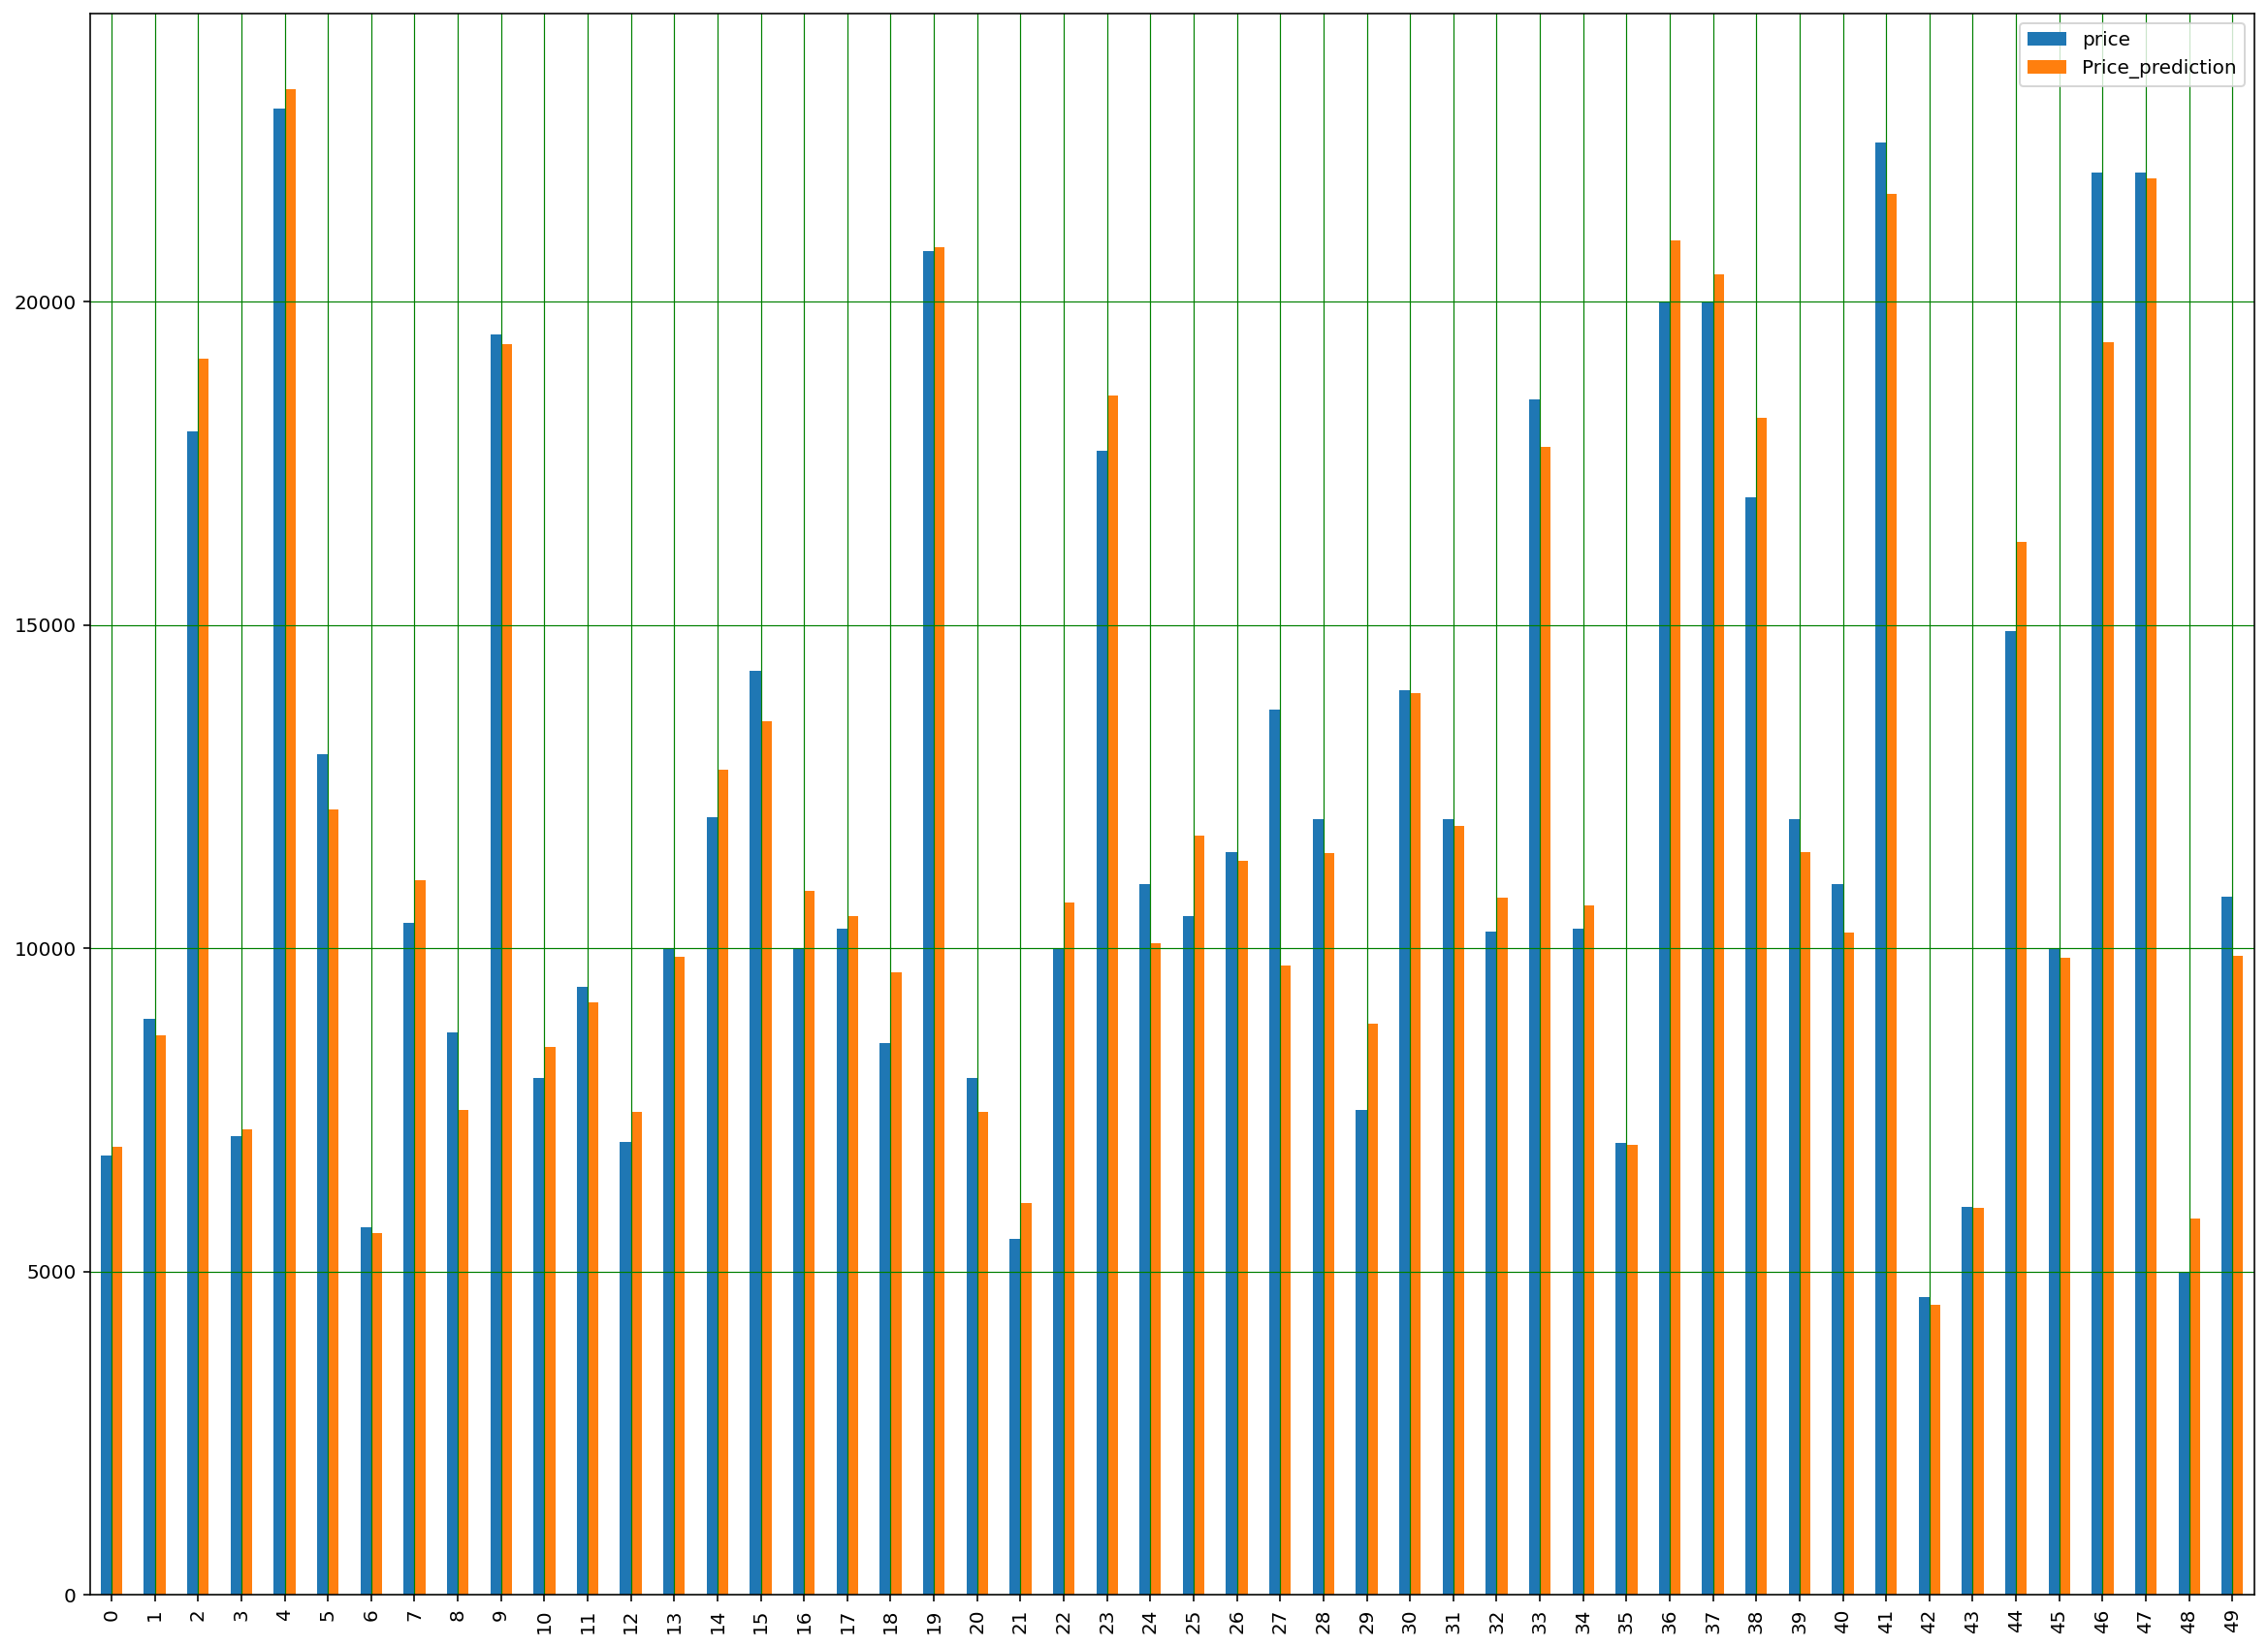

In [ ]:
x = 50
comparison = Comparison.head(x)
comparison.plot(kind = 'bar', figsize = (20,15))
plt.grid(linestyle = '-', linewidth = '0.6', color = 'green', which = 'both')
plt.show()